# Impulses

A step function in the forcing represents an effect that turns on and stays on. If we use a window function, the duration of the effect is limited. Now consider what happens if the window interval is $[T,T+\epsilon]$ and we let $\epsilon\to 0$.

If the forcing amplitude remains constant in this limit, then the total effect size must also go to zero. But if we let the forcing amplitude grow to keep the area under the curve constant, we simulate a fixed effect size acting at over an infinitesimally small window, i.e., a single instant. That reasoning motivates the following definition.

````{proof:definition} Impulse response
Let

```{math}
\delta_\epsilon(t) = \frac{1 - H(t -\epsilon)}{\epsilon},
```

and let $x_\epsilon(t)$ be the solution of

```{math}
x' - a x = \delta_\epsilon(t), \quad x(0)=0.
```

Then the {term}`impulse response` of the linear operator $\mathcal{A}[x]=x'-ax$ is the function

```{math}
\lim_{\epsilon \to 0} x_\epsilon(t).
```
````

As a shorthand, we say that the impulse response is the solution of

```{math}
x' - a x = \delta(t), \quad x(0)=0,
```

where $\delta(t)$ is called an {term}`impulse` or a {term}`delta function`. 

```{note}
A math pedant will never fail to remind you that $\delta(t)$ is not a true function, but rather something called a *distribution*. Just nod and edge away slowly.
```

## Impulse equals jump in value

It's not difficult to derive a formula for the impulse response when the coefficient $a$ in $\opA$ is constant. The solution to the window problem $x'-ax=\delta_\epsilon(t)$, $x(0)=0$ is

```{math}
x_\epsilon(t) = \frac{1}{a \epsilon} \left[  (e^{at}-1) - H(t-\epsilon) (e^{a(t-\epsilon)}-1) \right].
```

As $\epsilon\to 0$, we only care about what happens for $t> \epsilon$, which gives

```{math}
x_\epsilon(t) = \frac{e^{a t}}{a \epsilon}  \left( 1 - e^{-a\epsilon} \right), \quad (t > \epsilon).
```

Using L'Hôpital's Rule,

```{math}
\lim_{\epsilon\to 0} x_\epsilon(t) =e^{at} \left[ \lim_{\epsilon\to 0}  \frac{1 - e^{-a\epsilon}}{a \epsilon}\right] = e^{at}, \quad (t > 0).
```

This result, which generalizes to the case where $a$ depends on $t$, is worth stating in words as well as a formula.

```{proof:rule}
in a first-order linear ODE, the effect of an impulse is the same as an instantaneous increase by 1 in the value of the solution.
```

```{note}
With step forcing, we stated that $x(t)$ is continuous while $x'(t)$ has jumps. For impulses, it's $x(t)$ itself that jumps.
```

Applying superposition, we get the following.

````{proof:theorem} Impulse forcing
The solution of 

$$
x'-a(t)x=f(t) + k \delta(t), \quad x(0)=x_0, 
$$

where $a(t)$ and $f(t)$ are continuous, also satisfies

```{math}
x'-a(t)x=f(t), \quad x(0)=x_0+k,
```

for $t>0$. 
````

## Delayed impulse

A forcing function of the form $\delta(t-T)$ for $T>0$ has no effect for $t<T$, then causes a jump in value at $t=T$. That makes it relatively straightforward to apply superposition to solve particular examples. To solve

$$
x'-a(t)x = f(t) + k \delta(t-T), \quad x(0)=x_0,
$$

where $T>0$ and $a(t)$ and $f(t)$ are continuous, we first break the problem into homogeneous and particular solutions,

\begin{align*}
\opA[x_h] &= 0, \quad x_h(0)=x_0, \\
\opA[x_p] & = f(t) + k \delta(t-T),\quad x_p(0)=0.
\end{align*}

Now we find $x_p$ as different expressions before and after the impulse. For $t<T$, we have

$$
\opA[x_1]  = f(t), \quad x_1(0)=0.
$$

Then at $t=T the solution jumps and continues, so

$$
\opA[x_2]  = f(t), \quad x_2(T)=x_1(T)+k.
$$

We write $x_p$ using window and step functions as

$$
x_p(t) = x_1(t) [1-H(t-T)] + x_2(t) [H(t-T)] = x_1(t) + H(t-T) [ x_2(t)-x_1(t) ].
$$

Finally, $x(t)=x_h(t)+x_p(t)$.

It's awkward to write out all the pieces as one big formula, so it's better to think about using the process.

::::{admonition,dropdown,tip} Example
> Solve $x'+5x=3\delta(t-2)$, with $x(0)=1$.

The homogeneous solution is $x_h(t)=e^{-5t}$. For the particular part we have

\begin{align*}
\opA[x_1] &= 0, \quad x_1(0) = 0, \qquad (t<2),\\
\opA[x_2] &= 0, \quad x_2(2) = x_1(2)+3, \qquad (t>2).
\end{align*}

It's clear that $x_1(t)=0$ and thus $x_2$ solves $x'+5x=0,$ $x(2)=3$. Hence

$$
x_2(t) = 3e^{-5(t-2)}, \qquad (t>2).
$$

Finally, the solution is $x_h+x_p$, or

$$
x(t) = e^{-5t} + 0 + H(t-2) [x_2(t)-0] = e^{-5t} + 3 H(t-2) e^{-5(t-2)}.
$$
::::

## Numerical solution

The easiest way to solve these problems numerically is to solve the system first for $t<T$ and then for $t>T$, with the second solution having initial condition coming from the first. For the preceding example, we use:

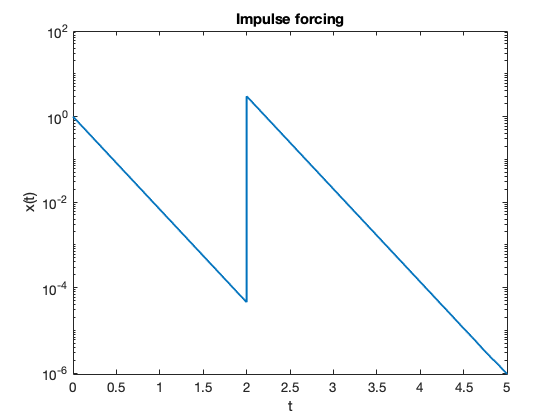

In [1]:
dxdt = @(t,x) -5*x;      % ODE without the delta
[t1,x1] = ode45(dxdt,[0,2],1);
x2init = 3+x1(end);      % uses the final value for x1
[t2,x2] = ode45(dxdt,[2,5],x2init);

semilogy([t1;t2],[x1;x2])     % stack the time and solution vectors
xlabel('t'), ylabel('x(t)')
title('Impulse forcing')

Because of the log scale on the $y$-axis, the graph has two straight lines with a jump increase at $t=2$.